In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import warnings

In [3]:
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

# VERİ SETİ HİKAYESİ PROBLEM: Şeker Hastalığı Tahmini

In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Lojistik Regression

## Model tahmin

In [6]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
y = df["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [9]:
X = df.loc[:,df.columns!="Outcome"]


In [10]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
loj_model = LogisticRegression(solver="liblinear").fit(X,y)

In [12]:
loj_model.intercept_

array([-5.8925225])

In [13]:
loj_model.coef_

array([[ 1.17061920e-01,  2.83894195e-02, -1.68880229e-02,
         7.55649933e-04, -6.42925073e-04,  5.97762380e-02,
         6.77482311e-01,  7.24176673e-03]])

In [14]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [15]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [16]:
y_pred = loj_model.predict(X)

In [17]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [18]:
accuracy_score(y,y_pred)

0.7747395833333334

In [19]:
from sklearn.metrics import classification_report


print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [20]:
loj_model.predict_proba(X)[0:10]

array([[0.35038563, 0.64961437],
       [0.91703422, 0.08296578],
       [0.22475047, 0.77524953],
       [0.92140111, 0.07859889],
       [0.16726207, 0.83273793],
       [0.79899988, 0.20100012],
       [0.88020731, 0.11979269],
       [0.27812627, 0.72187373],
       [0.32058549, 0.67941451],
       [0.92275407, 0.07724593]])

## Model Tuning

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [22]:
loj_cv_model = LogisticRegression(solver="liblinear").fit(X_train,y_train)

In [23]:
y_pred = loj_cv_model.predict(X_test)

In [24]:
print(accuracy_score(y_test,y_pred))

0.7532467532467533


In [25]:
from sklearn.model_selection import cross_val_score


cross_val_score(loj_cv_model,X_test,y_test,cv=10).mean()

0.7704710144927536

# K-En Yakın Komşu (KNN)

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Model$ Tahmin

In [27]:
y = df["Outcome"]
X = df.loc[:,df.columns!="Outcome"]

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [29]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)

In [30]:
knn_model

KNeighborsClassifier()

In [31]:
y_pred = knn_model.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred)

0.6883116883116883

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



# Model Tuning

In [34]:
knn = KNeighborsClassifier()
knn_params = {"n_neighbors":np.arange(1,50)}

In [35]:
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)

In [36]:
knn_cv_model.best_score_

0.748637316561845

In [37]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [38]:
## Final Model

In [39]:
knn_tuned = KNeighborsClassifier(n_neighbors=11).fit(X_train,y_train)

In [40]:
y_pred = knn_tuned.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred)

0.7316017316017316

In [42]:
knn_tuned.score(X_test,y_test)

0.7316017316017316

# DESTEK VEKTÖR

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

# Model & Tahmin

In [45]:
svm_model = SVC(kernel="linear").fit(X_train,y_train)

In [46]:
svm_model

SVC(kernel='linear')

In [47]:
y_pred = svm_model.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred)

0.7445887445887446

# Model Tuning

In [49]:
svm = SVC()
svm_params = {"C":np.arange(1,2),"kernel":["linear","rbf"]}

In [50]:
svc_cv_model = GridSearchCV(svm,svm_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [51]:
svc_cv_model.best_score_

0.7802007615091726

In [52]:
svc_cv_model.best_params_

{'C': 1, 'kernel': 'linear'}

In [53]:
svm_tuned = SVC(C=1,kernel="linear").fit(X_train,y_train)

In [54]:
y_pred = svm_tuned.predict(X_test)

In [55]:
accuracy_score(y_test,y_pred)

0.7445887445887446

# Yapay Sinir Ağları

In [56]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [58]:
scaler = StandardScaler()

In [59]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

# Model Tahmin

In [60]:
mlpc_model = MLPClassifier().fit(X_train,y_train)

c:\Users\S_05_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [61]:
mlpc_model.coefs_

[array([[ 1.45461875e-01, -4.39440281e-01,  3.10640432e-02,
         -2.45728454e-01,  9.70222197e-02,  9.13218513e-03,
         -1.41827817e-01, -3.73080029e-01, -3.29179398e-01,
         -3.33933493e-02, -3.02140350e-02, -3.66434102e-02,
          2.89693287e-01,  1.16974475e-01, -2.31363330e-02,
          7.23382490e-02, -2.51519533e-01, -1.39241468e-01,
         -2.37021213e-01,  1.00732290e-01, -2.57606318e-01,
         -1.32115105e-01, -7.37258436e-02, -2.11180111e-01,
          3.92759594e-01, -1.74859791e-01, -3.63901985e-02,
         -3.65283500e-01, -1.05528909e-01, -2.51174100e-01,
         -4.42279653e-01,  1.45168671e-01, -2.41054280e-01,
         -2.56840042e-01, -7.12263245e-02, -2.96923875e-01,
          5.79024887e-02, -2.09782049e-01, -1.35487913e-01,
          3.14317530e-01, -1.61021842e-01, -1.59652436e-01,
          1.92833636e-01, -7.74888110e-02, -1.48810310e-01,
          1.01710733e-01, -1.43697958e-01,  2.63797936e-01,
         -3.06907199e-01,  4.60948893e-0

In [62]:
help(mlpc_model)

Help on MLPClassifier in module sklearn.neural_network._multilayer_perceptron object:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identit

In [63]:
y_pred = mlpc_model.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred)

0.7489177489177489

# Model Tuning

In [65]:
mlpc_params = {"alpha":[0.0001],
                "hidden_layer_sizes":[(3,5)]}

In [66]:
mlpc = MLPClassifier(solver="lbfgs")

In [67]:
mlpc_cv_model = GridSearchCV(mlpc,mlpc_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [68]:
mlpc_cv_model.best_params_

{'alpha': 0.0001, 'hidden_layer_sizes': (3, 5)}

In [69]:
mlpc_tuned = MLPClassifier(activation="logistic",solver="lbfgs",alpha=1,hidden_layer_sizes=(3,5)).fit(X_train,y_train)

In [70]:
y_pred = mlpc_tuned.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred)

0.7575757575757576

# CART

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

# Model & Tahmin

In [73]:
cart_model = DecisionTreeClassifier().fit(X_train,y_train)

In [74]:
y_pred = cart_model.predict(X_test)

In [75]:
accuracy_score(y_test,y_pred)

0.6796536796536796

# Model Tuning

In [76]:
cart = DecisionTreeClassifier()

In [77]:
cart_params = {"max_depth":[5],
                "min_samples_split":[20]}
            

In [78]:
cart_cv_model = GridSearchCV(cart,cart_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [79]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 20}

In [80]:
# final model

In [81]:
cart_tuned = DecisionTreeClassifier(max_depth=5,min_samples_split=20).fit(X_train,y_train)

In [82]:
y_pred = cart_tuned.predict(X_test)

In [83]:
accuracy_score(y_test,y_pred)

0.7532467532467533

# Random Forest

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [85]:
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [86]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

# model Tuning

In [87]:
rf = RandomForestClassifier().fit(X_train,y_train)

In [88]:
rf_params = {"n_estimators":[500],
             "max_features":[8],
             "min_samples_split":[5]
             }

In [89]:
rf_cv_model = GridSearchCV(rf,rf_params,n_jobs=-1,verbose=2,cv=10).fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [90]:
rf_cv_model.best_params_

{'max_features': 8, 'min_samples_split': 5, 'n_estimators': 500}

In [91]:
rf_tuned = RandomForestClassifier(max_features=8,min_samples_split=5,n_estimators=500).fit(X_train,y_train)

In [92]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7402597402597403

In [93]:
#Değişken Önem Düzeyleri

<AxesSubplot: >

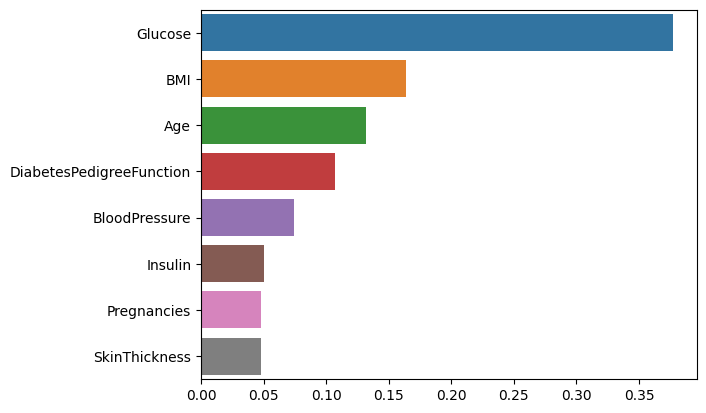

In [94]:
feature_imp = pd.Series(rf_tuned.feature_importances_,index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)

# Gradient Boosting Machines

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [96]:
gbm_model = GradientBoostingClassifier().fit(X_train,y_train)

In [97]:
help(gbm_model)

Help on GradientBoostingClassifier in module sklearn.ensemble._gb object:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  This algorithm builds an additive model in a forward stage-wise fashion; it
 |  allows for the optimization of arbitrary differentiable loss functions. In
 |  each stage ``n_classes_`` regression trees are fit on the negative gradient
 |  of the loss function, e.g. binary or multiclass log loss. Binary
 |  classification is a special case where only a single regressio

In [98]:
y_pred = gbm_model.predict(X_test)

In [99]:
accuracy_score(y_test,y_pred)

0.7489177489177489

## Model Tuning

In [100]:
gbm = GradientBoostingClassifier()
gbm_params  = {"learning_rate":[0.01],
                "n_estimators":[500],
                "max_depth":[5],
                }

In [101]:
gbm_cv_model = GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [102]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [103]:
gbm_tuned = GradientBoostingClassifier(learning_rate=0.01,n_estimators=500,max_depth=5).fit(X_train,y_train)

In [104]:
y_pred = gbm_tuned.predict(X_test)

In [105]:
accuracy_score(y_test,y_pred)

0.7316017316017316

<AxesSubplot: >

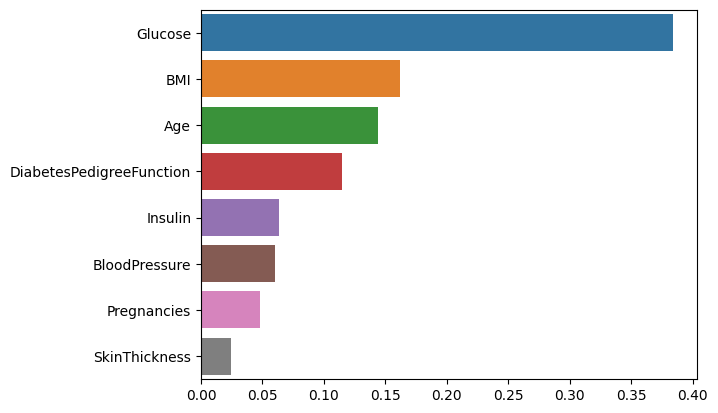

In [106]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)

# XG_BOOST

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

# Model Tahmin

In [108]:
from xgboost import XGBClassifier

In [109]:
xgb_model = XGBClassifier().fit(X_train,y_train)

In [110]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
           colsample_bylevel=1 <...> timators=100,
           n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)
File:        c:\users\s_05_\appdata\local\programs\python\python310\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning rate (xgb'

In [111]:
y_pred = xgb_model.predict(X_test)

In [112]:
accuracy_score(y_test,y_pred)

0.7359307359307359

# Model Tuning

In [113]:
xgb = XGBClassifier()

In [114]:
xgb_params = {"n_estimators":[500],
                "subsample":[0.6],
                "max_depth":[7],
                "learning_rate":[0.01]
                }

In [115]:
xgb_cv_model = GridSearchCV(xgb,xgb_params,cv=10,
verbose=2,n_jobs=-1).fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [116]:
xgb_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.6}

In [117]:
xgb_tuned = XGBClassifier(
    learning_rate=0.01, max_depth= 7, n_estimators= 500, subsample=0.6
).fit(X_train,y_train)

In [118]:
y_pred = xgb_tuned.predict(X_test)

In [119]:
accuracy_score(y_test,y_pred)

0.7402597402597403

<AxesSubplot: >

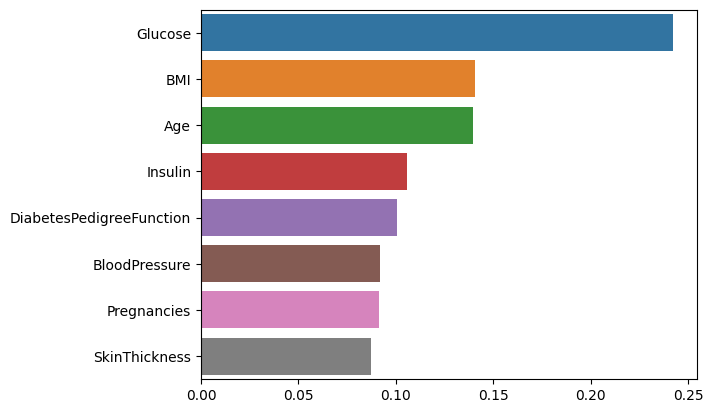

In [120]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)

# Light GBM

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [122]:
from lightgbm import LGBMClassifier

In [123]:
lgbm = LGBMClassifier().fit(X_train,y_train)

In [124]:
y_pred = lgbm.predict(X_test)

In [125]:
accuracy_score(y_test,y_pred)

0.7229437229437229

## Model Tuning

In [126]:
lgbm = LGBMClassifier()

In [127]:
lgbm_params = {
    "learning_rate":[0.01],
    "n_estimators":[500],
    "max_depth":[1]
    }


In [128]:
lgbm_cv_model = GridSearchCV(lgbm,lgbm_params,cv=2,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


In [129]:
lgbm_tuned = LGBMClassifier(learning_rate=0.01,max_depth=1,n_estimators=500).fit(X_train,y_train)

In [130]:
y_pred = lgbm_tuned.predict(X_test)

In [131]:
accuracy_score(y_test,y_pred)

0.7575757575757576

<AxesSubplot: >

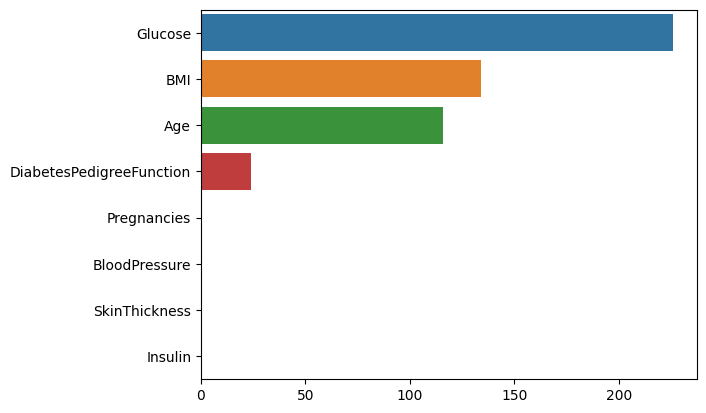

In [132]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)

# CAT BOOST

In [133]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [134]:
from catboost import CatBoostClassifier

In [135]:
catb_model = CatBoostClassifier().fit(X_train,y_train,verbose=False)

In [136]:
y_pred = catb_model.predict(X_test)

In [137]:
accuracy_score(y_test,y_pred)

0.7402597402597403

# Model Tuning End

In [138]:
catb  = CatBoostClassifier(verbose=False)

In [139]:
catb_params = {
    "iterations":[200],
    "learning_rate":[0.03],
    "depth":[8]

}

In [140]:
catb_cv_model = GridSearchCV(
    catb,catb_params,cv=5,n_jobs=-1,verbose=2
).fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [141]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.03}

In [142]:
catb_tuned = CatBoostClassifier(
    depth=8,iterations=200,learning_rate=0.03
).fit(X_train,y_train)

0:	learn: 0.6730317	total: 6.96ms	remaining: 1.39s
1:	learn: 0.6582932	total: 14.4ms	remaining: 1.43s
2:	learn: 0.6413374	total: 20.5ms	remaining: 1.35s
3:	learn: 0.6267884	total: 31.5ms	remaining: 1.54s
4:	learn: 0.6150338	total: 39.6ms	remaining: 1.54s
5:	learn: 0.5988569	total: 50.5ms	remaining: 1.63s
6:	learn: 0.5860830	total: 62.4ms	remaining: 1.72s
7:	learn: 0.5734710	total: 77.5ms	remaining: 1.86s
8:	learn: 0.5616034	total: 88.2ms	remaining: 1.87s
9:	learn: 0.5507407	total: 99.1ms	remaining: 1.88s
10:	learn: 0.5388119	total: 111ms	remaining: 1.91s
11:	learn: 0.5264274	total: 119ms	remaining: 1.86s
12:	learn: 0.5191433	total: 126ms	remaining: 1.82s
13:	learn: 0.5104236	total: 133ms	remaining: 1.77s
14:	learn: 0.5016788	total: 144ms	remaining: 1.78s
15:	learn: 0.4954697	total: 154ms	remaining: 1.77s
16:	learn: 0.4896572	total: 163ms	remaining: 1.75s
17:	learn: 0.4808284	total: 176ms	remaining: 1.78s
18:	learn: 0.4723731	total: 190ms	remaining: 1.81s
19:	learn: 0.4656953	total: 197

In [143]:
y_pred = catb_tuned.predict(X_test)

In [144]:
accuracy_score(y_test,y_pred)

0.7489177489177489

# TÜM MODELLERİN KARŞILAŞTIRLMASI

In [145]:
modeller = [
    knn_tuned,
    loj_model,
    svm_tuned,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned

]

In [148]:
sonuc = []
sonuclar = pd.DataFrame(columns=["Modeller","Accuracy"])
for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test,y_pred)
    sonuc = pd.DataFrame([[isimler,dogruluk*100]],columns=["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)

c:\Users\S_05_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'Modellerin Doğruluk Oranları')

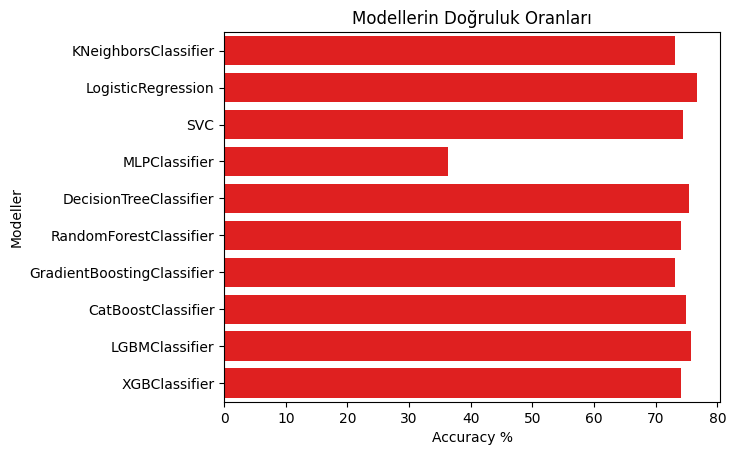

In [149]:
sns.barplot(x="Accuracy",y="Modeller",data=sonuclar,color="r")
plt.xlabel("Accuracy %")
plt.title("Modellerin Doğruluk Oranları")

In [150]:
sonuclar

,Modeller,Accuracy
0,KNeighborsClassifier,73.160173
0,LogisticRegression,76.623377
0,SVC,74.458874
0,MLPClassifier,36.363636
0,DecisionTreeClassifier,75.324675
0,RandomForestClassifier,74.025974
0,GradientBoostingClassifier,73.160173
0,CatBoostClassifier,74.891775
0,LGBMClassifier,75.757576
0,XGBClassifier,74.025974


# WHAT MORE?

1. Değişken Türetme / Değişken Mühendisliği
2. Değişken Seçme 
3. Otomatik Makine Öğrenmesi
4. Model Deployment - Önemli
5. 

<AxesSubplot: >

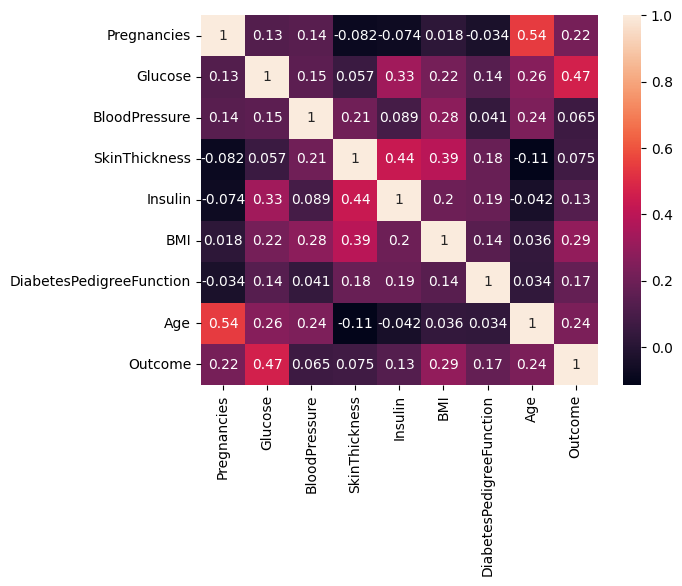

In [151]:
sns.heatmap(df.corr(),annot=True)